In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA







In [80]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
url = "cs-training.csv"
data = pd.read_csv(url)
data = data.drop(data.iloc[:, 0:1],axis = 1)
data = imp_mean.fit_transform(data)
X_train = data[:,1:len(data)]
Y_train = data[:,0]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

In [81]:
urltest = "cs-test.csv"
data = pd.read_csv(urltest)
data = data.drop(data.iloc[:, 0:1],axis = 1)
X_test = imp_mean.fit_transform(data)

In [82]:
url3 = "sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
y_test = []
for i in data:
  if(i > 0.5):
    y_test.append(1)
  else:
    y_test.append(0)

In [83]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

AdaBoost Accuracy Score on training set :- 0.15614285714285714
              precision    recall  f1-score   support

         0.0       0.95      0.10      0.18     98009
         1.0       0.07      0.93      0.13      6991

    accuracy                           0.16    105000
   macro avg       0.51      0.51      0.16    105000
weighted avg       0.89      0.16      0.18    105000



<AxesSubplot:>

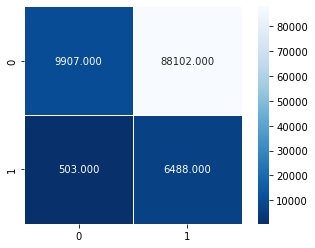

In [89]:
pred = clf.predict(X_train)
score = clf.score(X_train, y_train)
cm = confusion_matrix(y_train,pred)
print("AdaBoost Accuracy Score on training set :- " + str(score))
print(classification_report(y_train,pred))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

AdaBoost Accuracy Score on Validation set :- 0.9354444444444444
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     41965
         1.0       0.56      0.20      0.30      3035

    accuracy                           0.94     45000
   macro avg       0.75      0.60      0.63     45000
weighted avg       0.92      0.94      0.92     45000



<AxesSubplot:>

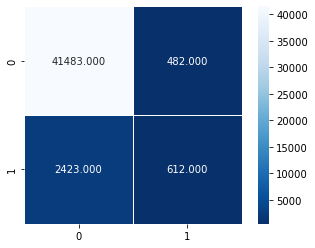

In [84]:
pred = clf.predict(X_valid)
score = clf.score(X_valid, y_valid)
cm = confusion_matrix(y_valid,pred)
print("AdaBoost Accuracy Score on Validation set :- " + str(score))
print(classification_report(y_valid,pred))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

AdaBoost Accuracy Score on testing set :- 0.9866999004955519
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99798
           1       0.57      0.85      0.68      1705

    accuracy                           0.99    101503
   macro avg       0.78      0.92      0.84    101503
weighted avg       0.99      0.99      0.99    101503



<AxesSubplot:>

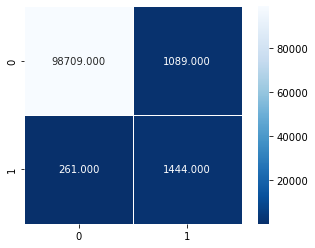

In [85]:
pred1 = clf.predict(X_test)
score = clf.score(X_test, y_test)
cm = confusion_matrix(y_test,pred1)
print("AdaBoost Accuracy Score on testing set :- " + str(score))
print(classification_report(y_test,pred1))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [86]:
test_loss =[]

iteration=[]
for i in range (1,11):
    iteration.append(i*25)
    clf = AdaBoostClassifier(n_estimators=(i*25), random_state=0)
    clf.fit(X_train, y_train)
    pred2 = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test,pred2)
    # print("AdaBoost Accuracy Score on testing set :- " + str(score))
    # print(classification_report(y_test,pred1))
    # sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    test_loss.append(log_loss(y_test , pred2))




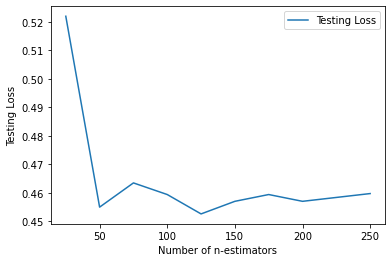

In [87]:
plt.plot(iteration,test_loss,label = "Testing Loss")
plt.xlabel("Number of n-estimators")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

Accuracy Score For Test (max depth = 1) : 0.9831729111454833
Precision Score For Test (max depth = 1) : 0.9831729111454833
Recall Score For Test (max depth = 1) : 0.9831729111454833

Accuracy Score For Test (max depth = 2) : 0.98320246692216
Precision Score For Test (max depth = 2) : 0.98320246692216
Recall Score For Test (max depth = 2) : 0.98320246692216

Accuracy Score For Test (max depth = 3) : 0.741120952090086
Precision Score For Test (max depth = 3) : 0.741120952090086
Recall Score For Test (max depth = 3) : 0.741120952090086

Accuracy Score For Test (max depth = 4) : 0.7873954464400067
Precision Score For Test (max depth = 4) : 0.7873954464400067
Recall Score For Test (max depth = 4) : 0.7873954464400067

Accuracy Score For Test (max depth = 5) : 0.9310266691624878
Precision Score For Test (max depth = 5) : 0.9310266691624878
Recall Score For Test (max depth = 5) : 0.9310266691624878

Accuracy Score For Test (max depth = 6) : 0.8846043959291844
Precision Score For Test (max dep

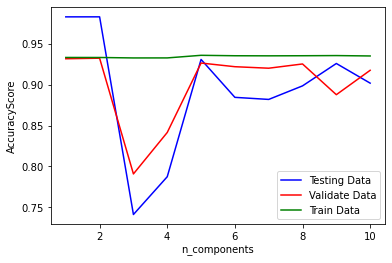

In [88]:
arr = [1,2,3,4,5,6,7,8,9,10]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
    clf = PCA(n_components = i)
    X_train2 = clf.fit_transform(X_train)
    X_valid2 = clf.fit_transform(X_valid)
    X_test2 = clf.fit_transform(X_test)
    clf = AdaBoostClassifier(n_estimators=(75), random_state=0)
    clf.fit(X_train2, y_train)
    pred_test = clf.predict(X_test2)
    pred_val = clf.predict(X_valid2)
    pred_train = clf.predict(X_train2)
    score = clf.score(X_test2, y_test)
    accuracy_score_test = accuracy_score(y_test,pred_test)
    recall_score_test = recall_score(y_test,pred_test,average = "micro")
    precision_score_test = precision_score(y_test,pred_test,average = "micro")
    test_plot.append(accuracy_score_test)

    recall_score_validate = recall_score(y_valid, pred_val, average = "micro")
    precision_score_validate = precision_score(y_valid, pred_val, average = "micro")
    accuracy_score_validate = accuracy_score(y_valid, pred_val)
    validate_plot.append(accuracy_score_validate)

    recall_score_train = recall_score(y_train, pred_train, average = "micro")
    precision_score_train = precision_score(y_train, pred_train, average = "micro")
    accuracy_score_train = accuracy_score(y_train, pred_train)
    train_plot.append(accuracy_score_train)
    print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
    print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
    print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
    print()
plt.xlabel("n_components")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()
